In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.colors as colors
from scripts.conversion import *
import pandas as pd
from sklearn.metrics import average_precision_score, precision_recall_curve
import energyflow as ef


In [4]:
cd ..

/home/rd804/discriminator-metric


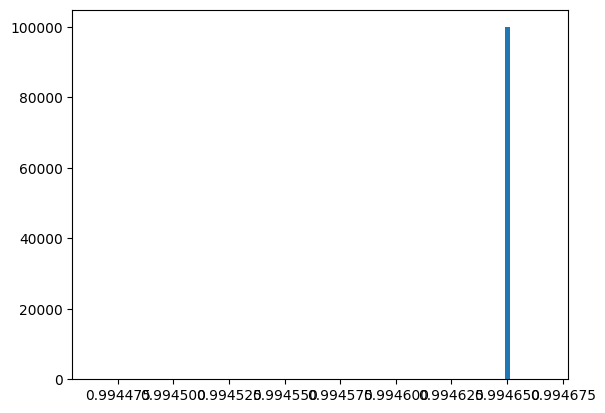

In [105]:

score = np.load(f'output/test_2_cartesian_particlenet/score_val_15.npy')[:,0]
weight = score/(1-score)

plt.hist(weight,bins=100)
plt.show()

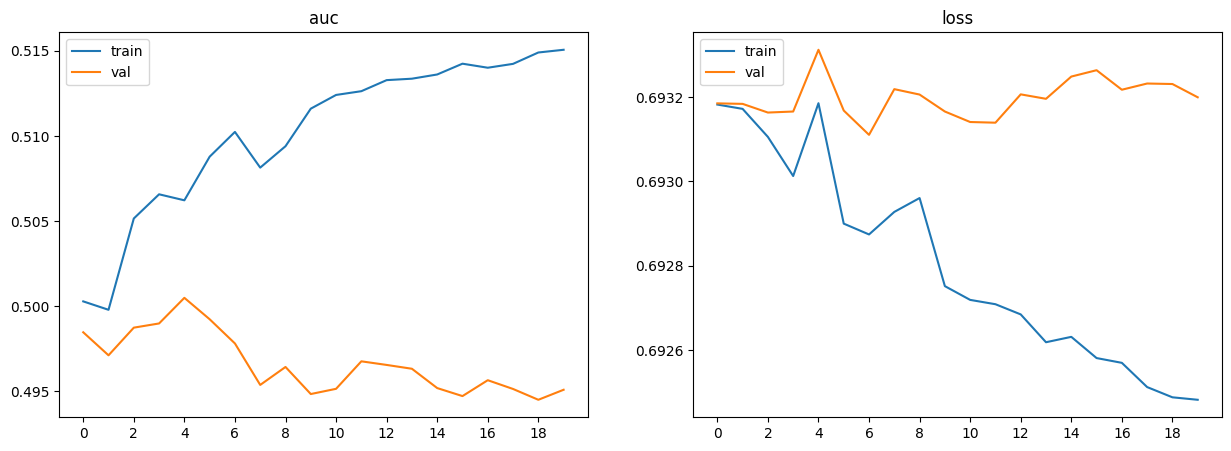

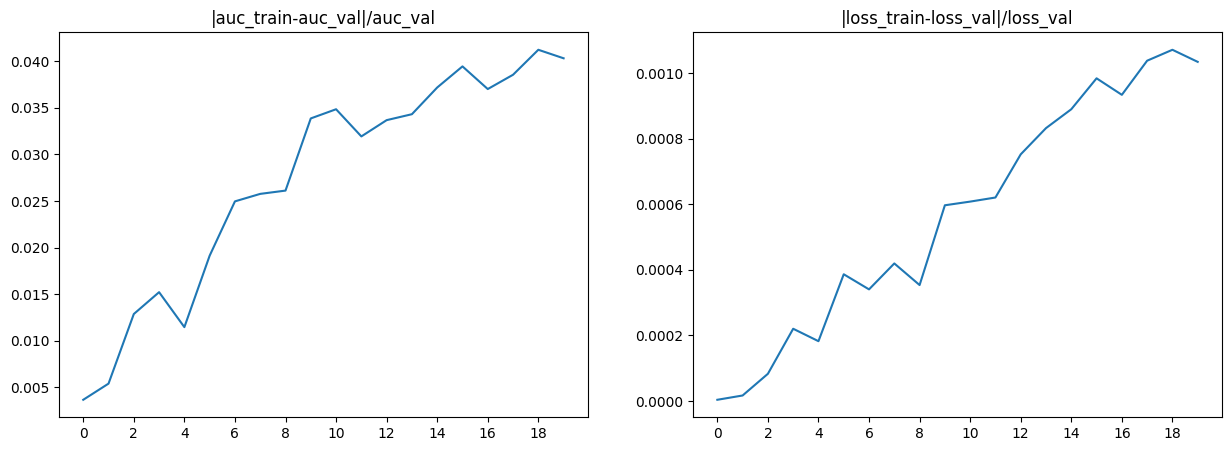

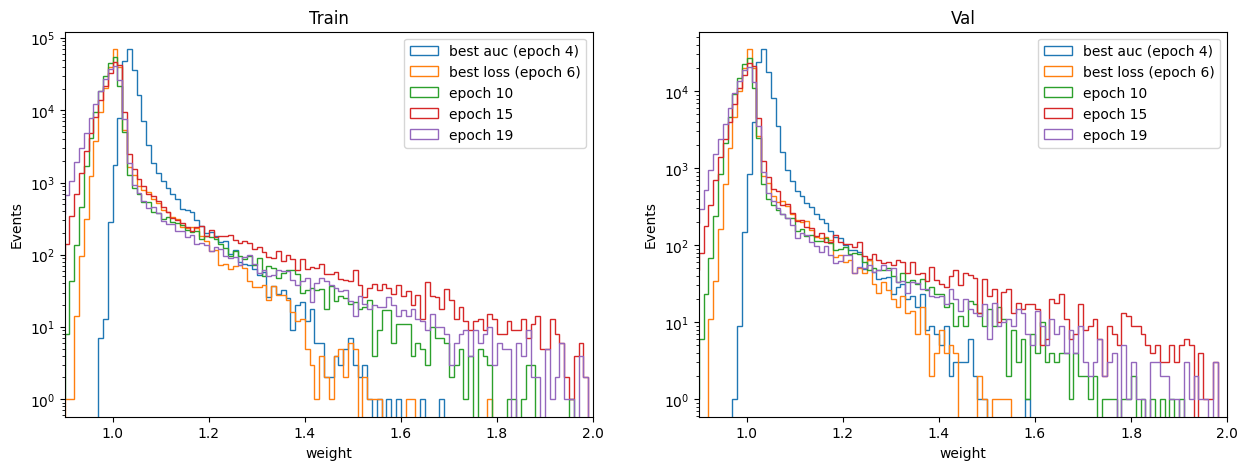

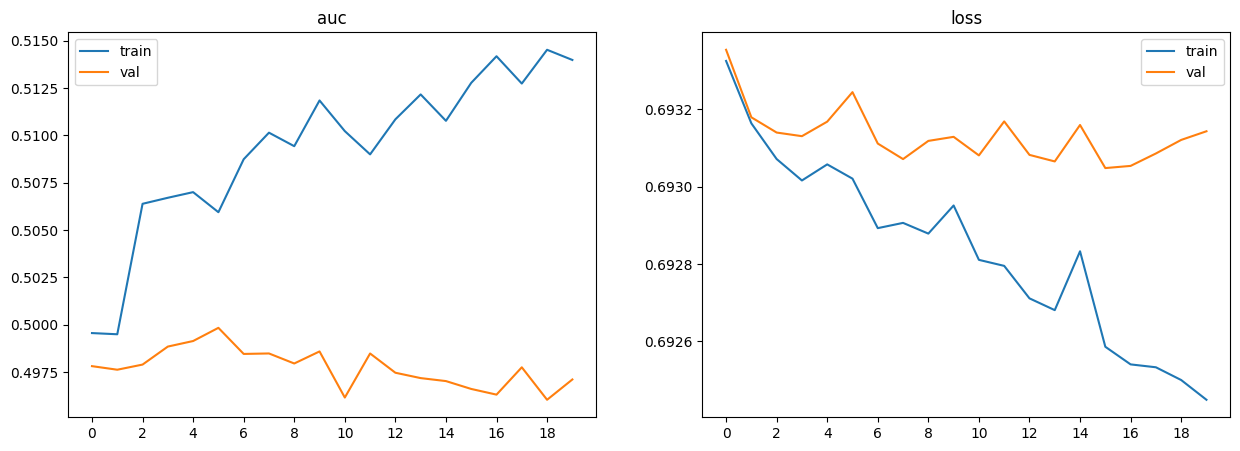

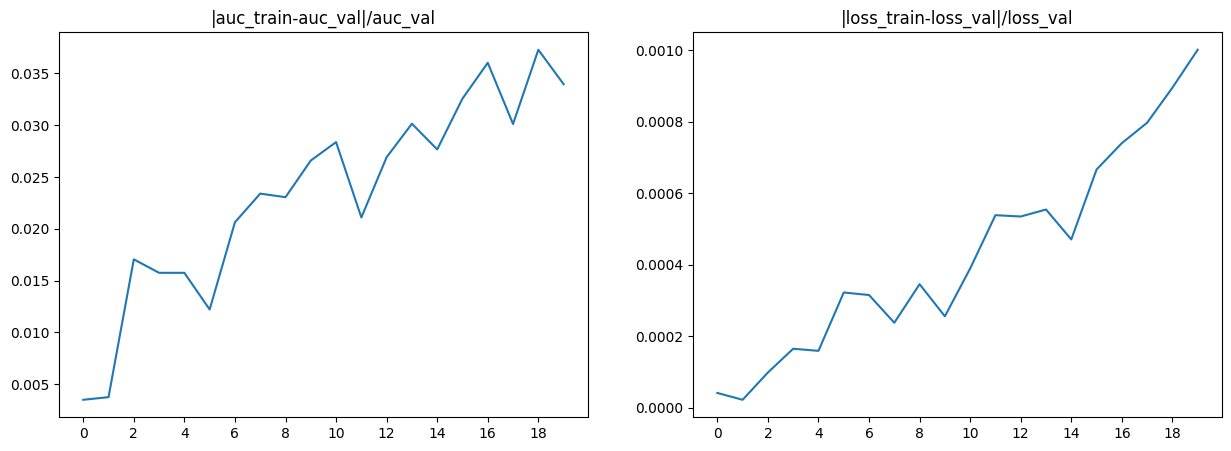

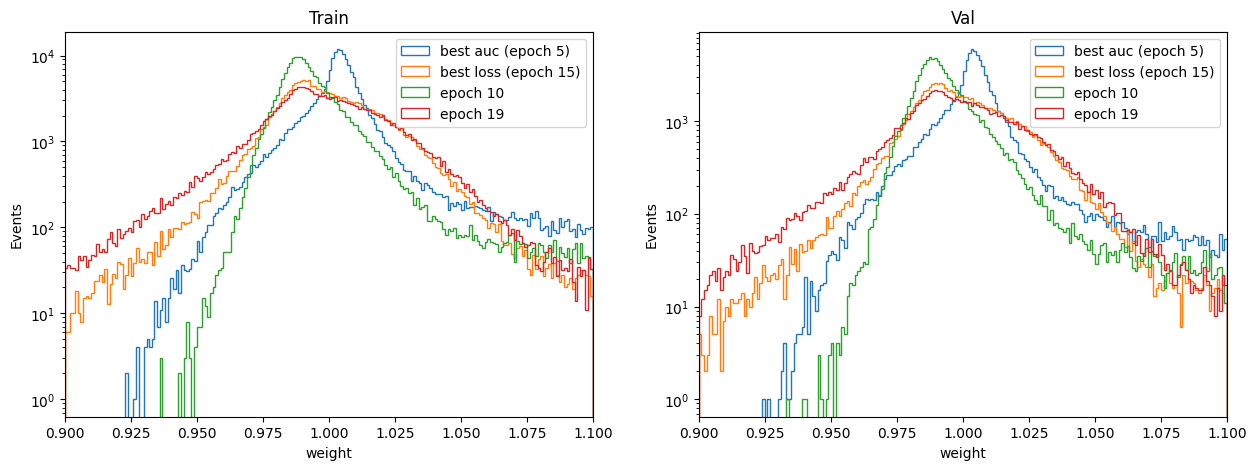

In [6]:
distortion = 'tailcut'

for trial in range(1,3,1):
    auc_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/auc_train.npy')
    auc_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/auc_val.npy')

    loss_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/loss_train.npy')
    loss_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/loss_val.npy')
    # best auc epoch
    best_auc_epoch = np.argmax(auc_val)
    # best loss epoch
    best_loss_epoch = np.argmin(loss_val)


    # 3 figures side by side
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)

    plt.plot(auc_train, label='train')
    plt.plot(auc_val, label='val')
    plt.title('auc')
  #  plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
  #  plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.xticks(np.arange(0, 20, 2))
    plt.legend()
   # plt.show()
    plt.subplot(1,2,2)

    plt.plot(loss_train, label='train')
    plt.plot(loss_val, label='val')
    plt.title('loss')

    plt.xticks(np.arange(0, 20, 2))
    #plt.ylim(0.6931,0.6932)
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()


    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,2)

    plt.plot(np.abs(loss_train-loss_val)/loss_val)
   # plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
    plt.title('|loss_train-loss_val|/loss_val')

 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
   # plt.show()

    plt.subplot(1,2,1)

    plt.plot(np.abs(auc_train-auc_val)/auc_val)
   # plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
    plt.title('|auc_train-auc_val|/auc_val')

 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.show()

    epochs = [best_auc_epoch, best_loss_epoch, 10, 15, 19]

    fig, [ax_t,ax_v] = plt.subplots(nrows=1, ncols=2,figsize=(15,5)) 

    for i,epoch in enumerate(epochs):
        score_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/score_val_{epoch}.npy')[:,0]
        score_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/score_train_{epoch}.npy')[:,0]
        weight_val = score_val/(1-score_val)
        weight_train = score_train/(1-score_train)

        

        if trial in [2,3]:
            if i == 0:
                ax_t.hist(weight_train, bins=np.arange(0.9,1.1,0.001), label=f'best auc (epoch {epoch})', histtype='step')

            elif i == 1:
                ax_t.hist(weight_train, bins=np.arange(0.9,1.1,0.001), label=f'best loss (epoch {epoch})', histtype='step')

            else:
                if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                    continue
                ax_t.hist(weight_train, bins=np.arange(0.9,1.1,0.001), label=f'epoch {epoch}', histtype='step')

                ax_t.set_xlim(0.9,1.1)

        else:
            if i == 0:
                ax_t.hist(weight_train, bins=np.arange(0,2,0.01), label=f'best auc (epoch {epoch})', histtype='step')

            elif i == 1:
                ax_t.hist(weight_train, bins=np.arange(0,2,0.01), label=f'best loss (epoch {epoch})', histtype='step')

            else:
                if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                    continue
                ax_t.hist(weight_train, bins=np.arange(0,2,0.01), label=f'epoch {epoch}', histtype='step')

                ax_t.set_xlim(0.9,2)

        if trial in [2,3]:
            if i == 0:
                ax_v.hist(weight_val, bins=np.arange(0.9,1.1,0.001), label=f'best auc (epoch {epoch})', histtype='step')

            elif i == 1:
                ax_v.hist(weight_val, bins=np.arange(0.9,1.1,0.001), label=f'best loss (epoch {epoch})', histtype='step')

            else:
                if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                    continue
                ax_v.hist(weight_val, bins=np.arange(0.9,1.1,0.001), label=f'epoch {epoch}', histtype='step')

                ax_v.set_xlim(0.9,1.1)

        else: 
            if i == 0:
                ax_v.hist(weight_val, bins=np.arange(0,2,0.01), label=f'best auc (epoch {epoch})', histtype='step')


            elif i == 1:
                ax_v.hist(weight_val, bins=np.arange(0,2,0.01), label=f'best loss (epoch {epoch})', histtype='step')

            else:
                if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                    continue
                ax_v.hist(weight_val, bins=np.arange(0,2,0.01), label=f'epoch {epoch}', histtype='step')

                ax_v.set_xlim(0.9,2)

        ax_t.legend()
        ax_v.legend()
        ax_t.set_yscale('log')
        ax_v.set_yscale('log')
        ax_t.set_xlabel('weight')
        ax_v.set_xlabel('weight')
        ax_t.set_ylabel('Events')
        ax_v.set_ylabel('Events')
        ax_t.set_title('Train')
        ax_v.set_title('Val')
    plt.show()



 


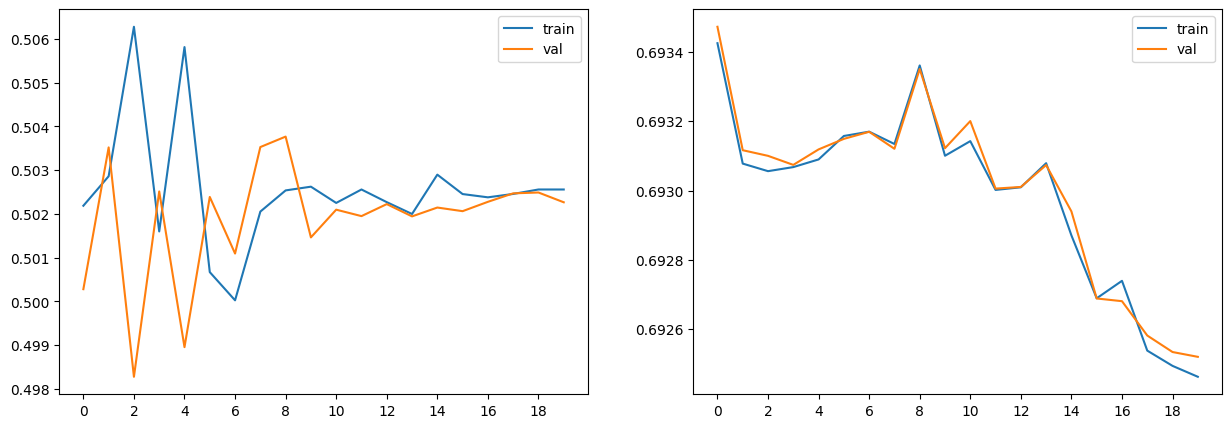

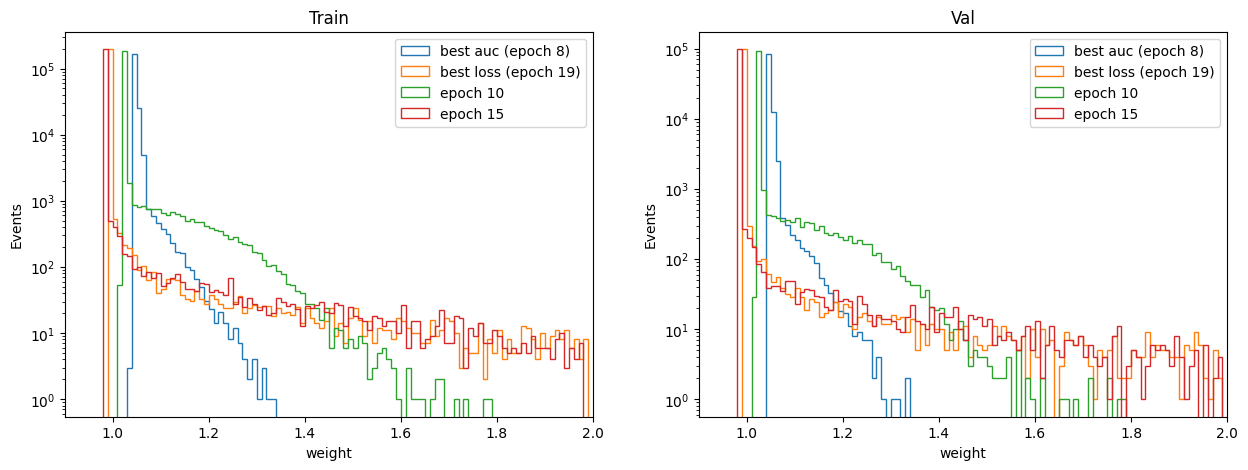

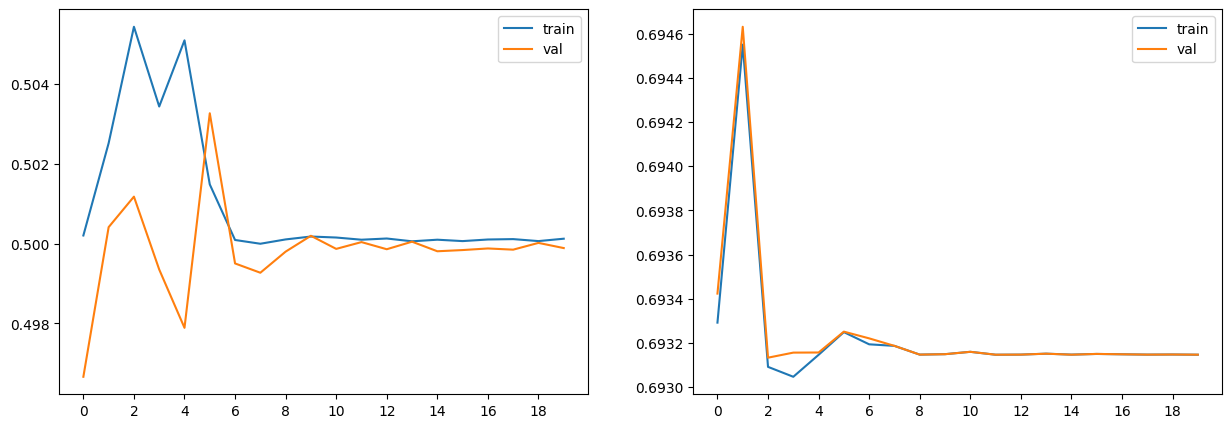

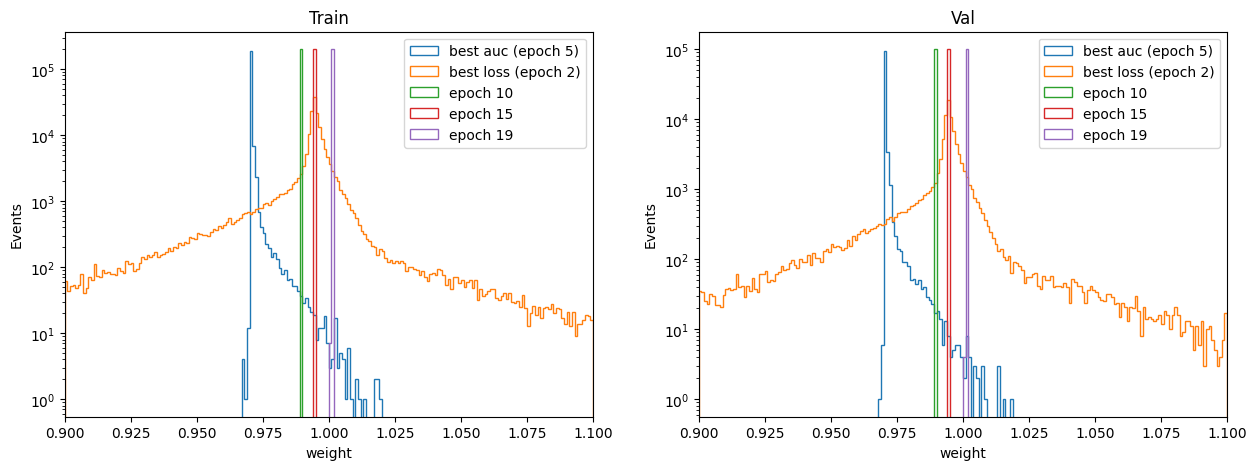

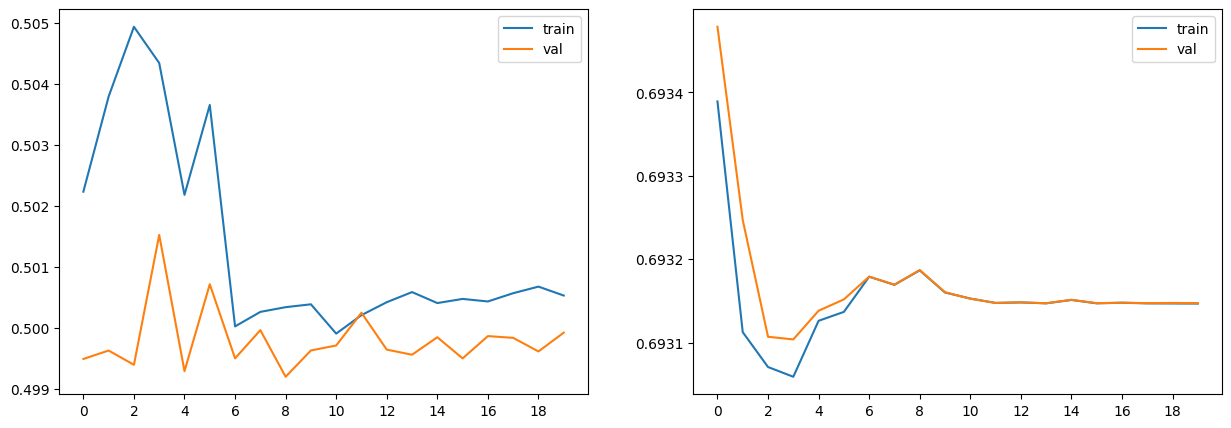

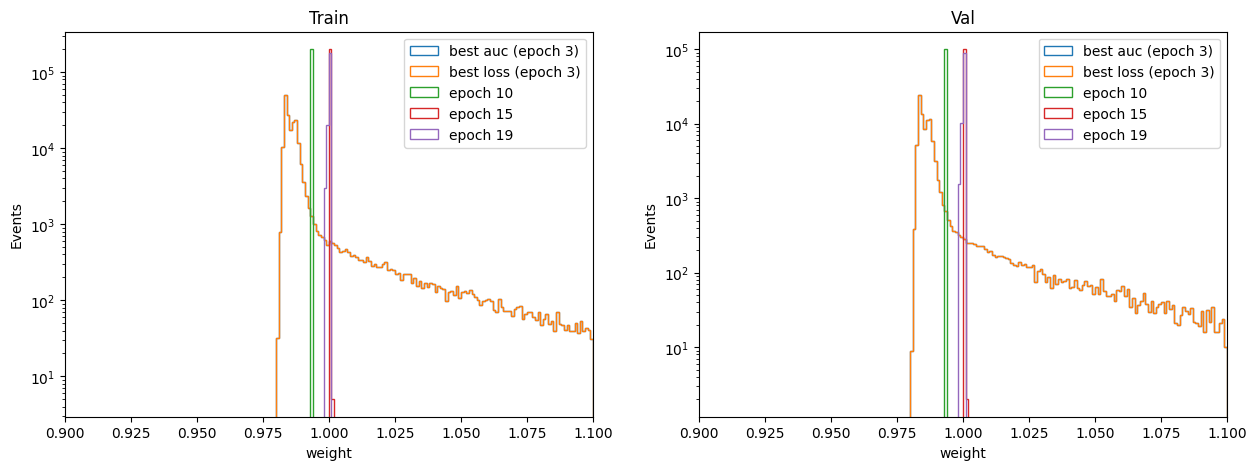

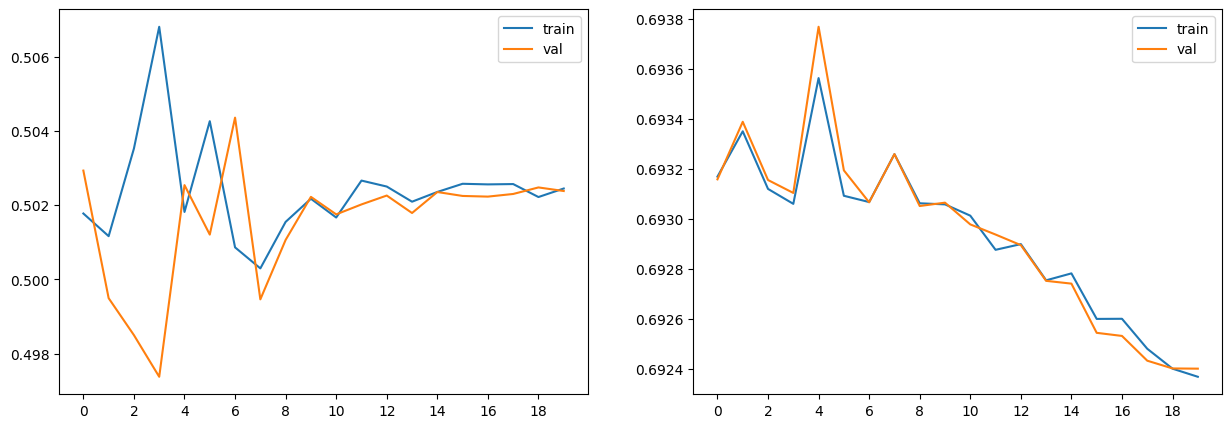

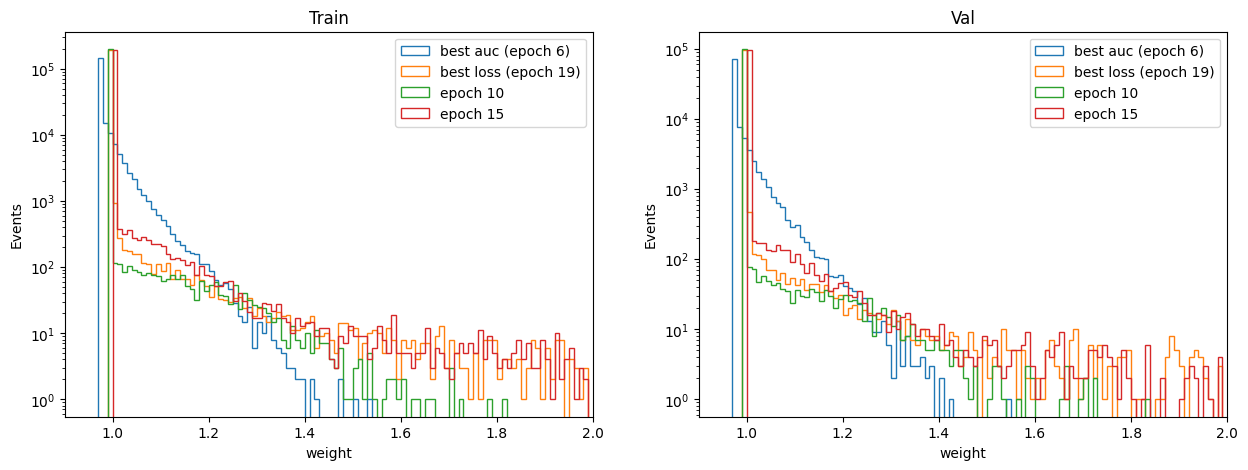

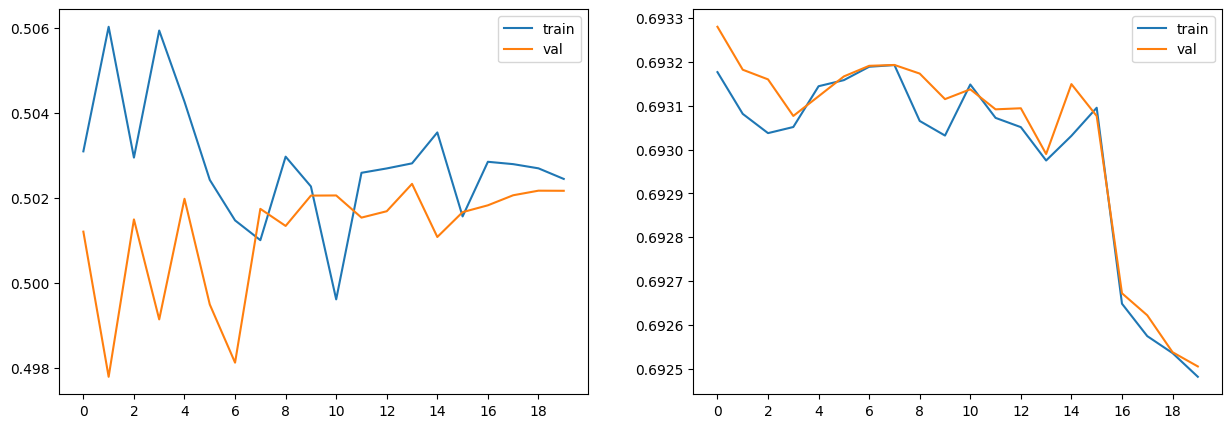

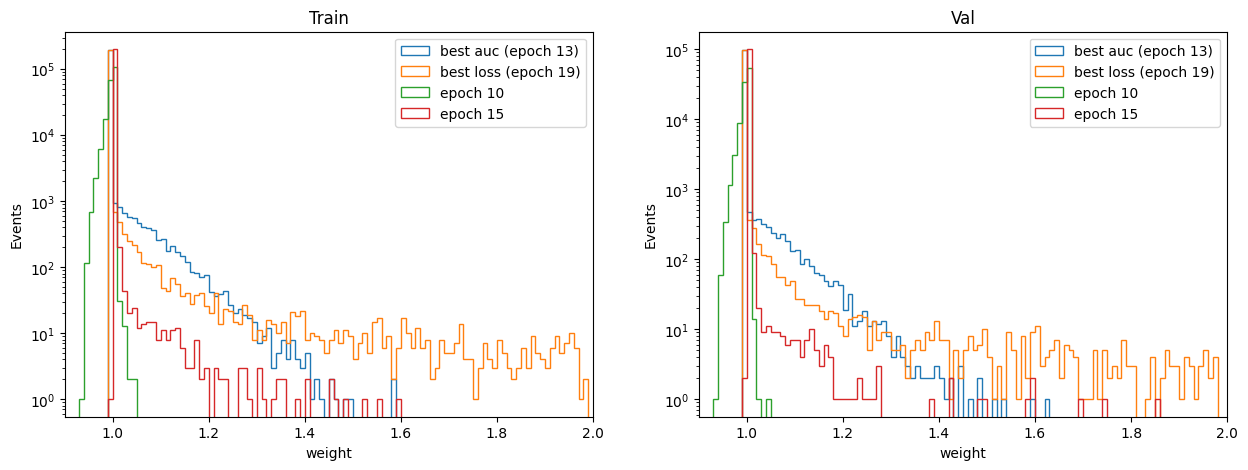

In [142]:

for trial in range(1,6,1):
    auc_train = np.load(f'output/test_{trial}_cartesian_particlenet/auc_train.npy')
    auc_val = np.load(f'output/test_{trial}_cartesian_particlenet/auc_val.npy')

    loss_train = np.load(f'output/test_{trial}_cartesian_particlenet/loss_train.npy')
    loss_val = np.load(f'output/test_{trial}_cartesian_particlenet/loss_val.npy')
    # best auc epoch
    best_auc_epoch = np.argmax(auc_val)
    # best loss epoch
    best_loss_epoch = np.argmin(loss_val)


    # 3 figures side by side
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)

    plt.plot(auc_train, label='train')
    plt.plot(auc_val, label='val')
  #  plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
  #  plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.xticks(np.arange(0, 20, 2))
    plt.legend()
   # plt.show()
    plt.subplot(1,2,2)

    plt.plot(loss_train, label='train')
    plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()


    epochs = [best_auc_epoch, best_loss_epoch, 10, 15, 19]

    fig, [ax_t,ax_v] = plt.subplots(nrows=1, ncols=2,figsize=(15,5)) 

    for i,epoch in enumerate(epochs):
        score_val = np.load(f'output/test_{trial}_cartesian_particlenet/score_val_{epoch}.npy')[:,0]
        score_train = np.load(f'output/test_{trial}_cartesian_particlenet/score_train_{epoch}.npy')[:,0]
        weight_val = score_val/(1-score_val)
        weight_train = score_train/(1-score_train)

        

        if trial in [2,3]:
            if i == 0:
                ax_t.hist(weight_train, bins=np.arange(0.9,1.1,0.001), label=f'best auc (epoch {epoch})', histtype='step')

            elif i == 1:
                ax_t.hist(weight_train, bins=np.arange(0.9,1.1,0.001), label=f'best loss (epoch {epoch})', histtype='step')

            else:
                if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                    continue
                ax_t.hist(weight_train, bins=np.arange(0.9,1.1,0.001), label=f'epoch {epoch}', histtype='step')

                ax_t.set_xlim(0.9,1.1)

        else:
            if i == 0:
                ax_t.hist(weight_train, bins=np.arange(0,2,0.01), label=f'best auc (epoch {epoch})', histtype='step')

            elif i == 1:
                ax_t.hist(weight_train, bins=np.arange(0,2,0.01), label=f'best loss (epoch {epoch})', histtype='step')

            else:
                if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                    continue
                ax_t.hist(weight_train, bins=np.arange(0,2,0.01), label=f'epoch {epoch}', histtype='step')

                ax_t.set_xlim(0.9,2)

        if trial in [2,3]:
            if i == 0:
                ax_v.hist(weight_val, bins=np.arange(0.9,1.1,0.001), label=f'best auc (epoch {epoch})', histtype='step')

            elif i == 1:
                ax_v.hist(weight_val, bins=np.arange(0.9,1.1,0.001), label=f'best loss (epoch {epoch})', histtype='step')

            else:
                if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                    continue
                ax_v.hist(weight_val, bins=np.arange(0.9,1.1,0.001), label=f'epoch {epoch}', histtype='step')

                ax_v.set_xlim(0.9,1.1)

        else: 
            if i == 0:
                ax_v.hist(weight_val, bins=np.arange(0,2,0.01), label=f'best auc (epoch {epoch})', histtype='step')


            elif i == 1:
                ax_v.hist(weight_val, bins=np.arange(0,2,0.01), label=f'best loss (epoch {epoch})', histtype='step')

            else:
                if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                    continue
                ax_v.hist(weight_val, bins=np.arange(0,2,0.01), label=f'epoch {epoch}', histtype='step')

                ax_v.set_xlim(0.9,2)

        ax_t.legend()
        ax_v.legend()
        ax_t.set_yscale('log')
        ax_v.set_yscale('log')
        ax_t.set_xlabel('weight')
        ax_v.set_xlabel('weight')
        ax_t.set_ylabel('Events')
        ax_v.set_ylabel('Events')
        ax_t.set_title('Train')
        ax_v.set_title('Val')
    plt.show()

   


In [3]:
pwd

'/home/rd804/discriminator-metric'

In [6]:
trials_truth = [f'trial_{i+1}_pn_truth' for i in range(5)]

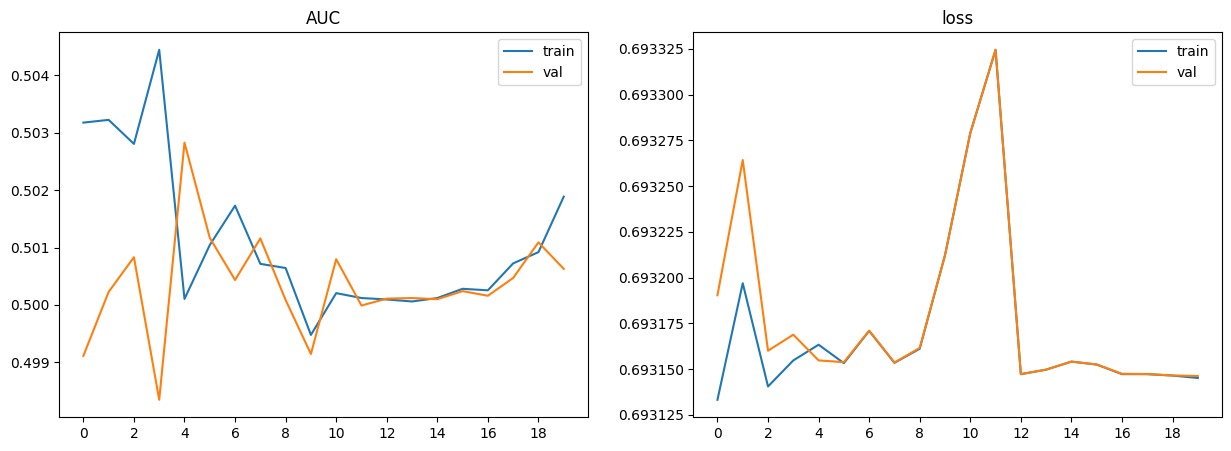

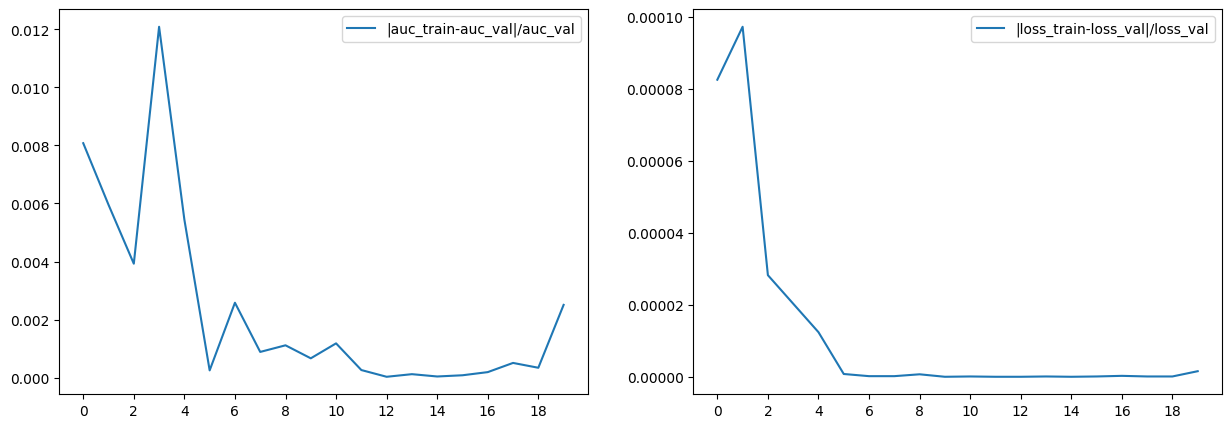

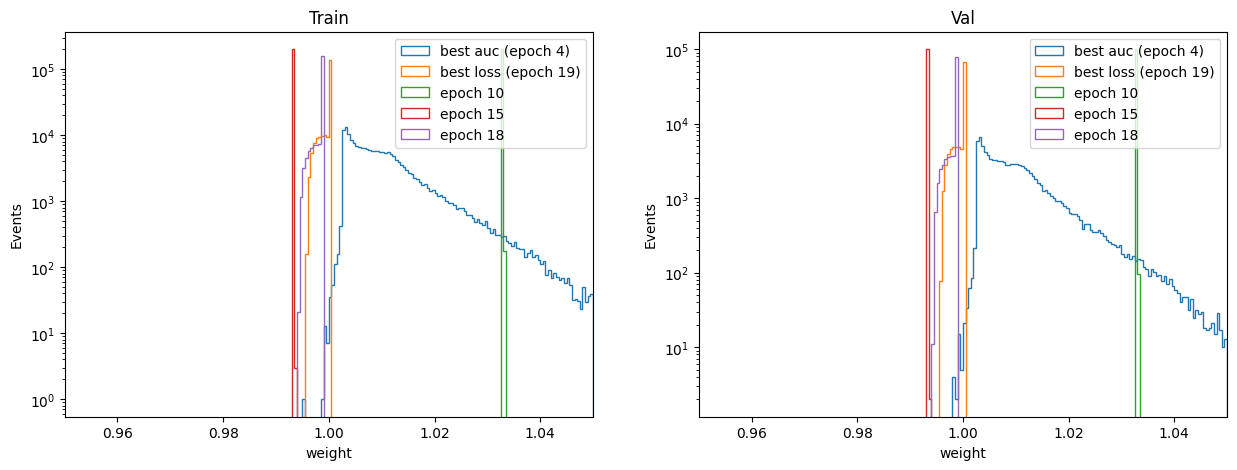

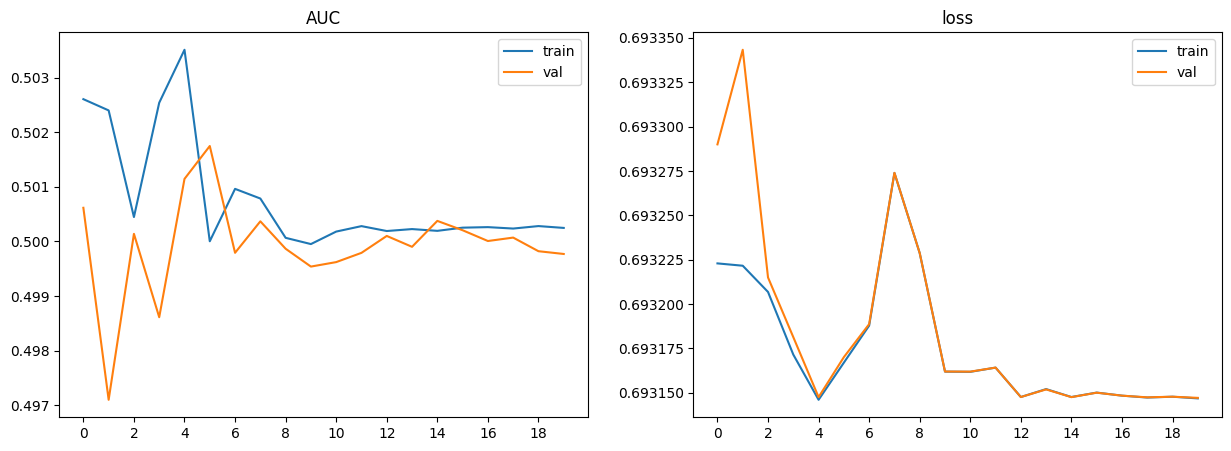

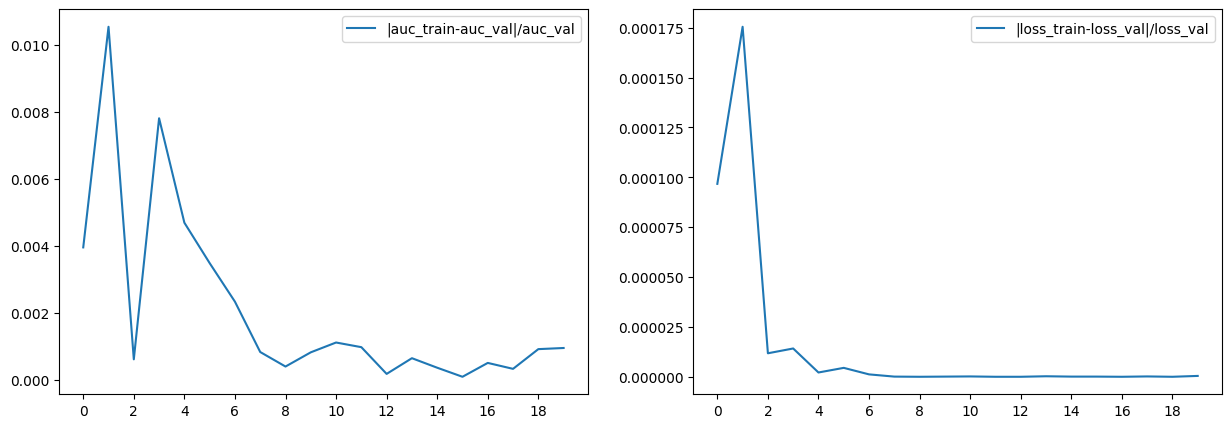

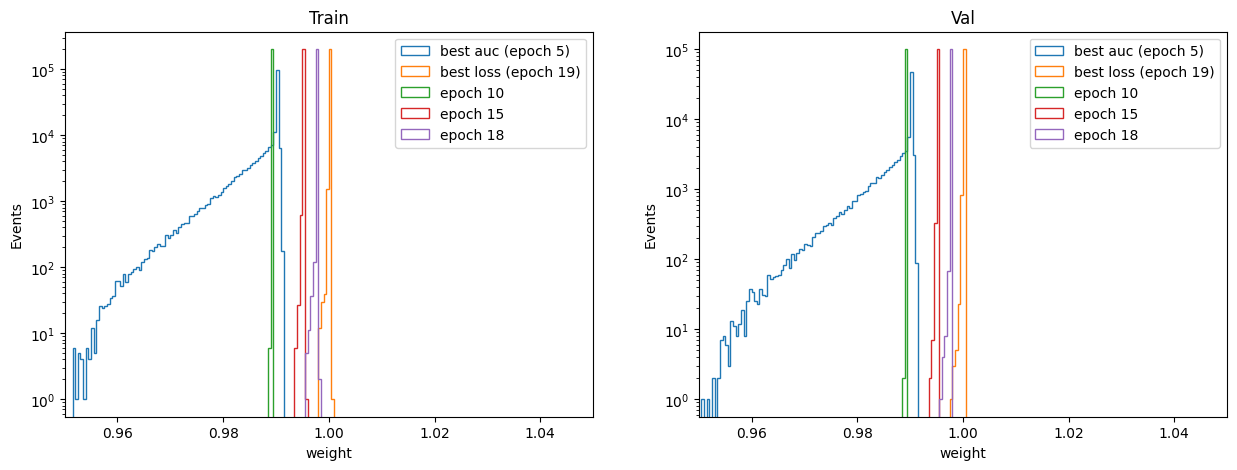

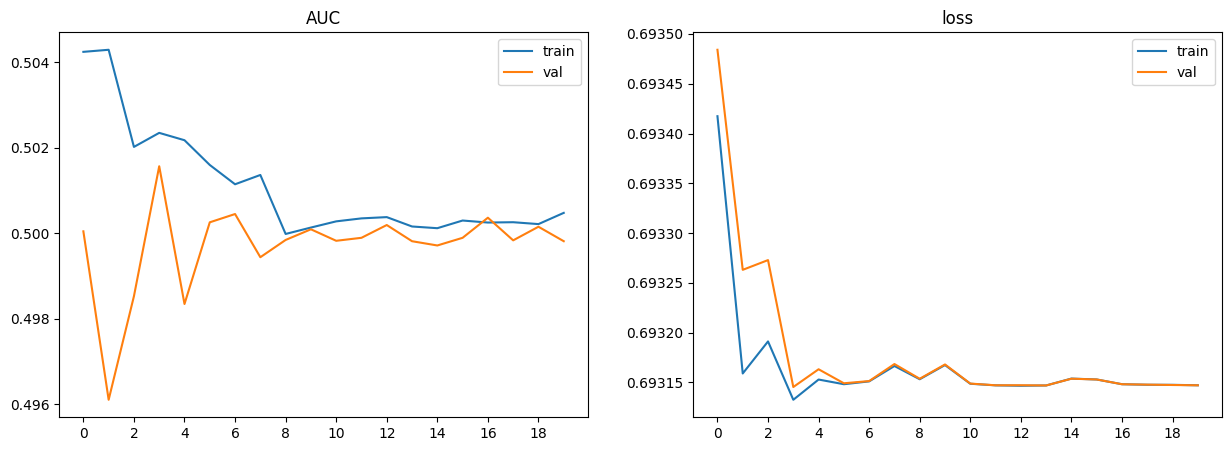

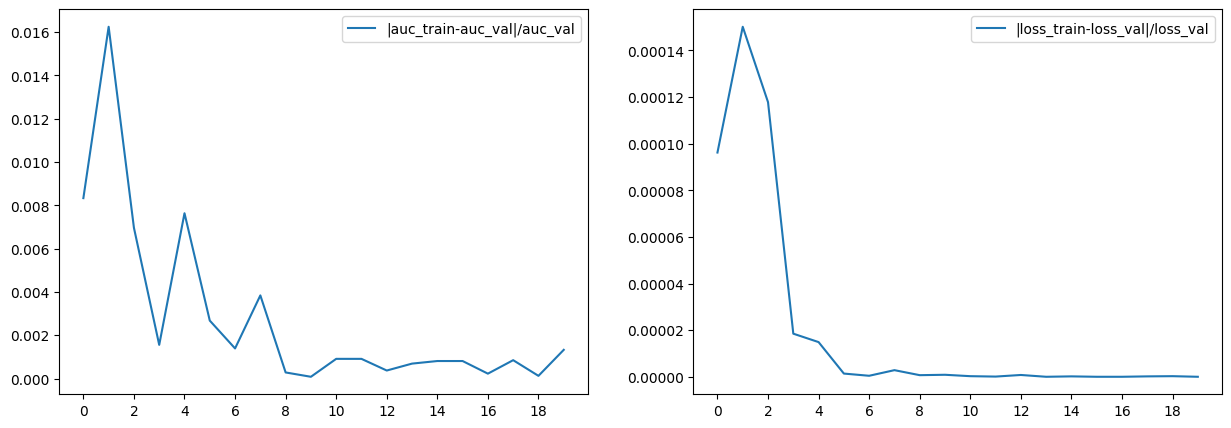

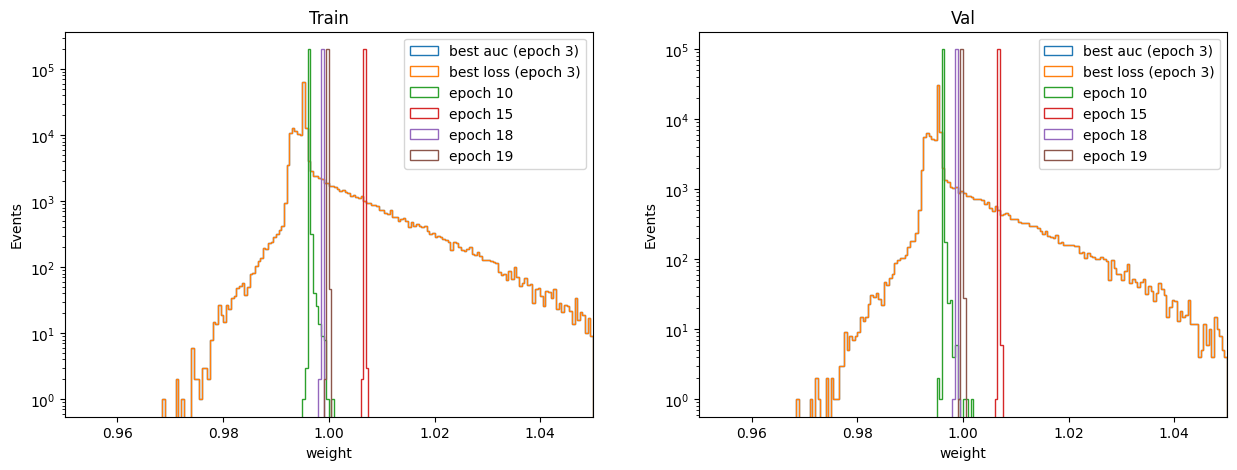

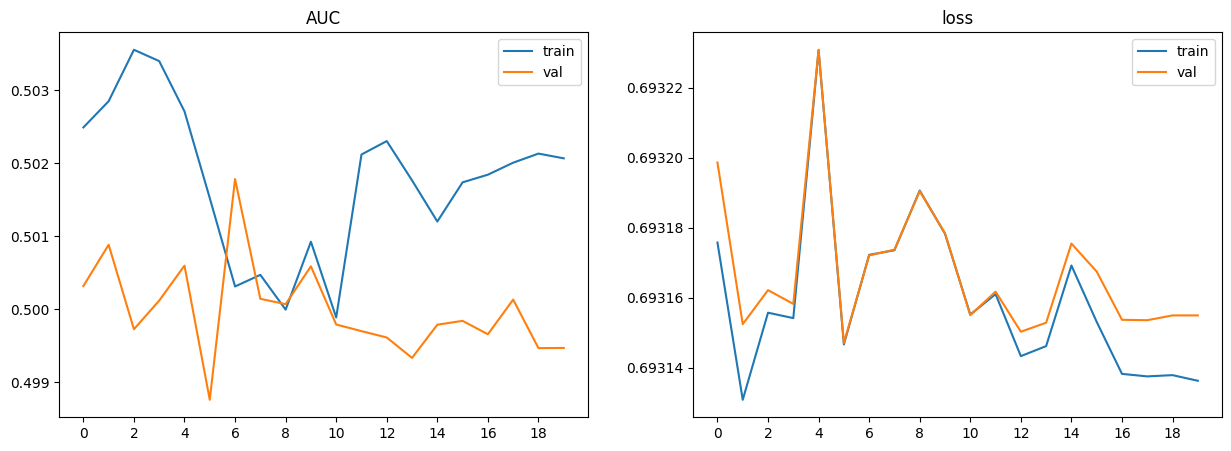

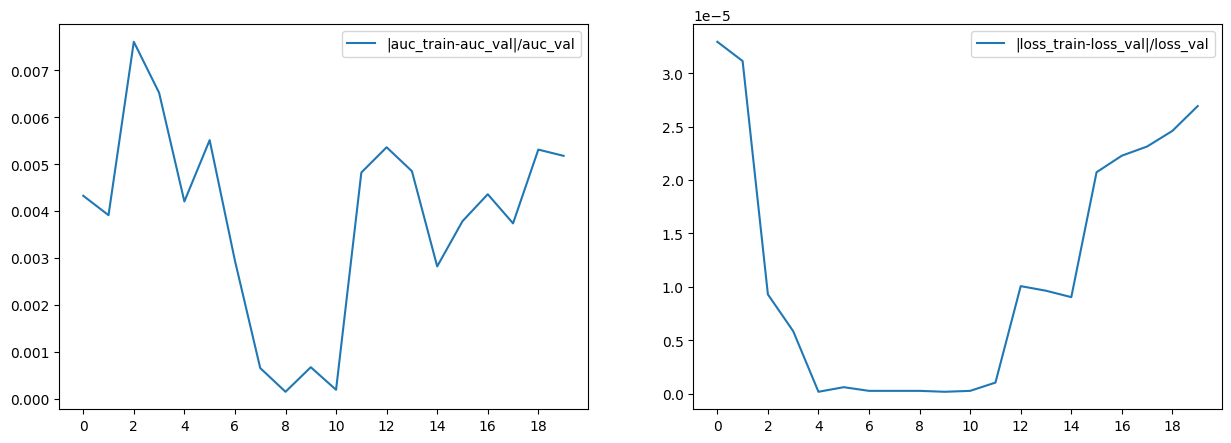

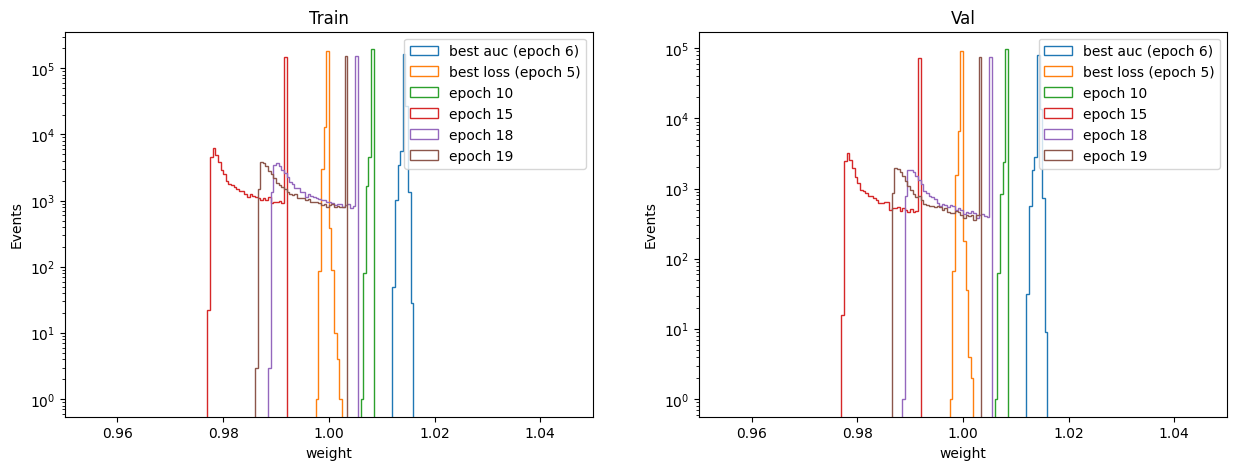

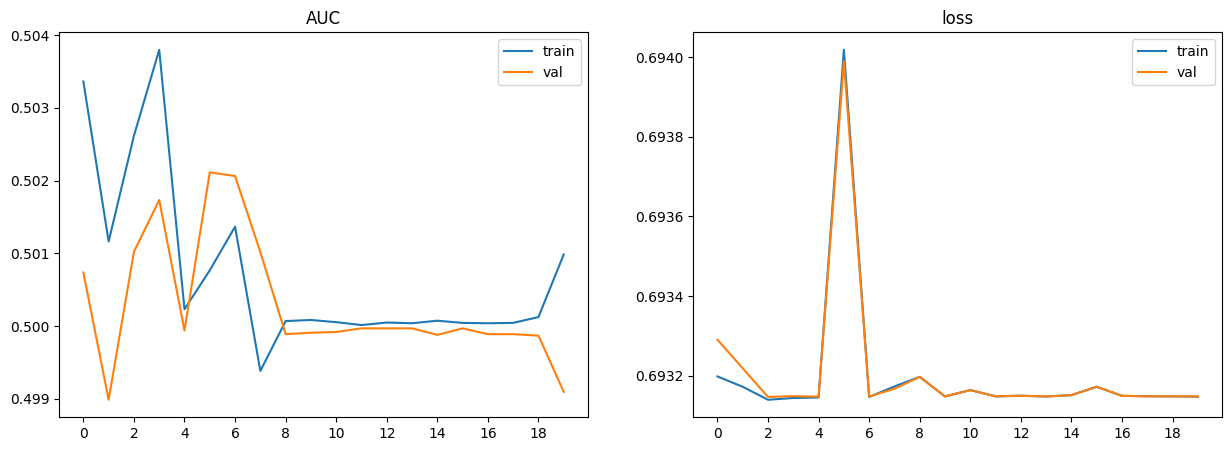

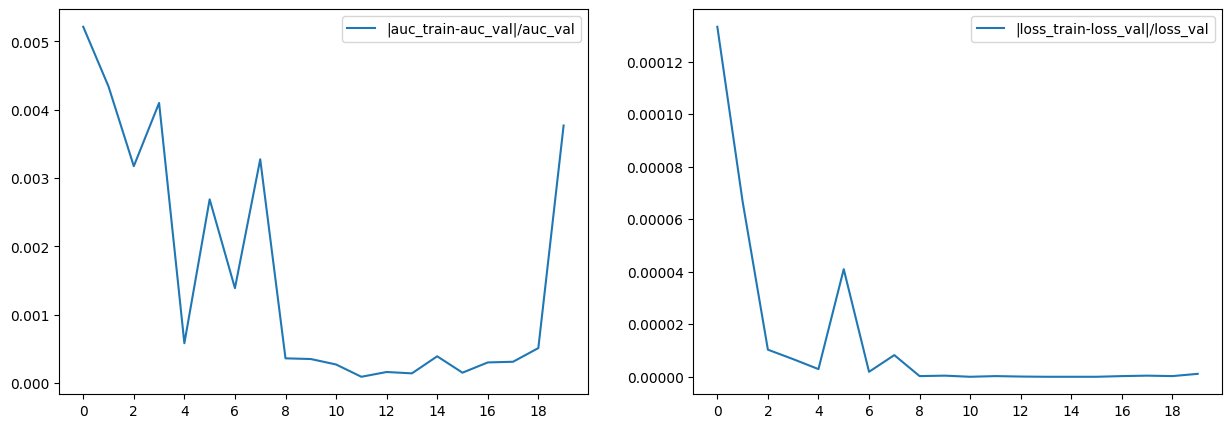

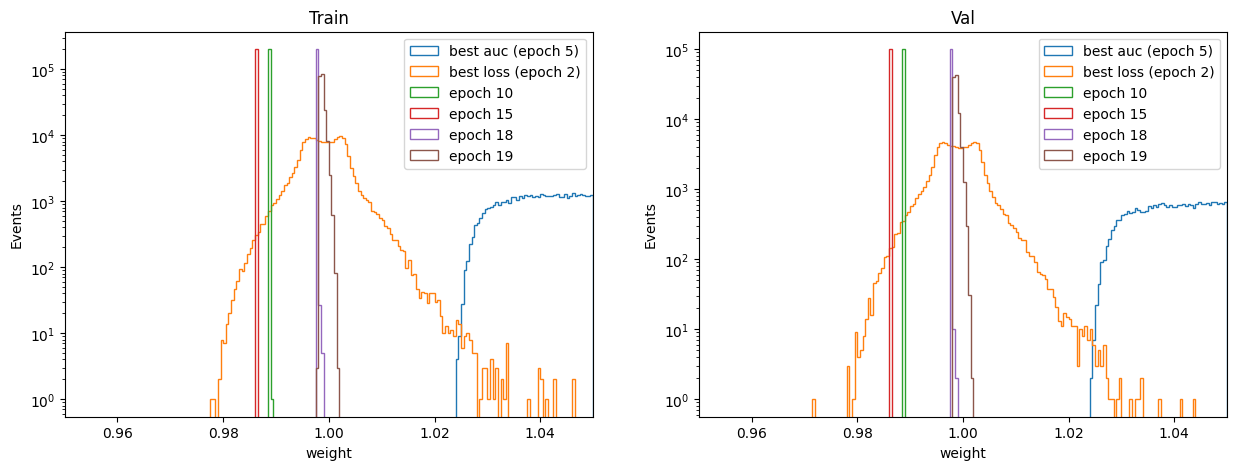

In [6]:
distortion = 'truth'

for trial in range(1,6,1):
    auc_train = np.load(f'output/trial_{trial}_pn_{distortion}/auc_train.npy')
    auc_val = np.load(f'output/trial_{trial}_pn_{distortion}/auc_val.npy')

    loss_train = np.load(f'output/trial_{trial}_pn_{distortion}/loss_train.npy')
    loss_val = np.load(f'output/trial_{trial}_pn_{distortion}/loss_val.npy')
    # best auc epoch
    best_auc_epoch = np.argmax(auc_val)
    # best loss epoch
    best_loss_epoch = np.argmin(loss_val)


    # 3 figures side by side
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)

    plt.plot(auc_train, label='train')
    plt.plot(auc_val, label='val')
    plt.title('AUC')
  #  plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
  #  plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.xticks(np.arange(0, 20, 2))
    plt.legend()
   # plt.show()
    plt.subplot(1,2,2)

    plt.plot(loss_train, label='train')
    plt.plot(loss_val, label='val')
    plt.title('loss')
    plt.xticks(np.arange(0, 20, 2))
    #plt.ylim(0.6931,0.6932)
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()


    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,2)

    plt.plot(np.abs(loss_train-loss_val)/loss_train, label='|loss_train-loss_val|/loss_val')
   # plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
   # plt.show()

    plt.subplot(1,2,1)

    plt.plot(np.abs(auc_train-auc_val)/auc_train, label='|auc_train-auc_val|/auc_val')
   # plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()





    epochs = [best_auc_epoch, best_loss_epoch, 10, 15, 18, 19]

    fig, [ax_t,ax_v] = plt.subplots(nrows=1, ncols=2,figsize=(15,5)) 

    for i,epoch in enumerate(epochs):
        score_val = np.load(f'output/trial_{trial}_pn_{distortion}/score_val_{epoch}.npy')[:,0]
        score_train = np.load(f'output/trial_{trial}_pn_{distortion}/score_train_{epoch}.npy')[:,0]
        weight_val = score_val/(1-score_val)
        weight_train = score_train/(1-score_train)

        

        if i == 0:
            ax_t.hist(weight_train, bins=np.arange(0.95,1.05,0.0005), label=f'best auc (epoch {epoch})', histtype='step')

        elif i == 1:
            ax_t.hist(weight_train, bins=np.arange(0.95,1.05,0.0005), label=f'best loss (epoch {epoch})', histtype='step')

        else:
            if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                continue
            ax_t.hist(weight_train, bins=np.arange(0.95,1.05,0.0005), label=f'epoch {epoch}', histtype='step')

            ax_t.set_xlim(0.95,1.05)




        if i == 0:
            ax_v.hist(weight_val, bins=np.arange(0.95,1.05,0.0005), label=f'best auc (epoch {epoch})', histtype='step')

        elif i == 1:
            ax_v.hist(weight_val, bins=np.arange(0.95,1.05,0.0005), label=f'best loss (epoch {epoch})', histtype='step')

        else:
            if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                continue
            ax_v.hist(weight_val, bins=np.arange(0.95,1.05,0.0005), label=f'epoch {epoch}', histtype='step')

            ax_v.set_xlim(0.95,1.05)


        ax_t.legend()
        ax_v.legend()
        ax_t.set_yscale('log')
        ax_v.set_yscale('log')
        ax_t.set_xlabel('weight')
        ax_v.set_xlabel('weight')
        ax_t.set_ylabel('Events')
        ax_v.set_ylabel('Events')
        ax_t.set_title('Train')
        ax_v.set_title('Val')
        #ax_t.set_ylim(0.6931,0.6932)
    plt.show()



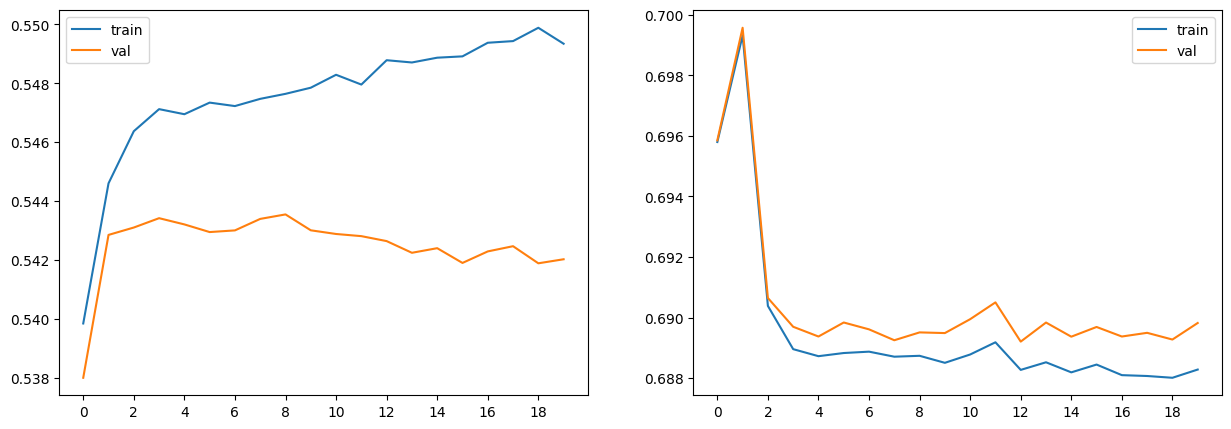

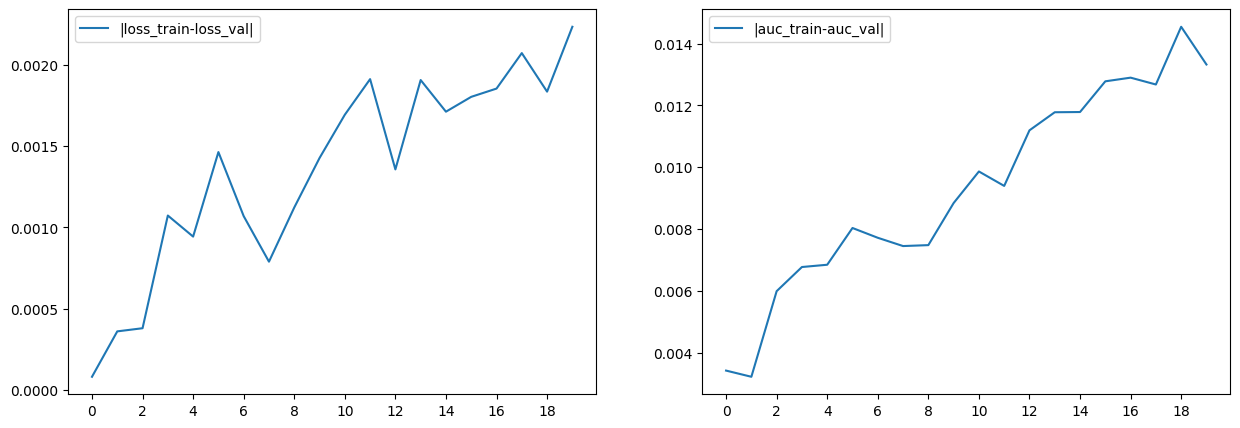

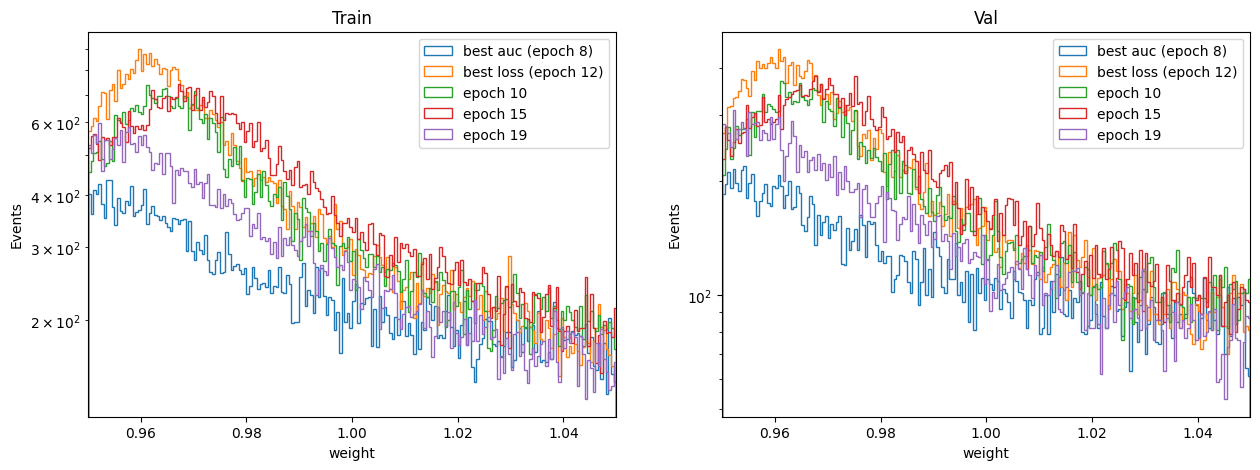

In [3]:
distortion = 'shifted'

for trial in [1]:
    auc_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/auc_train.npy')
    auc_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/auc_val.npy')

    loss_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/loss_train.npy')
    loss_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/loss_val.npy')
    # best auc epoch
    best_auc_epoch = np.argmax(auc_val)
    # best loss epoch
    best_loss_epoch = np.argmin(loss_val)


    # 3 figures side by side
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)

    plt.plot(auc_train, label='train')
    plt.plot(auc_val, label='val')
  #  plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
  #  plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.xticks(np.arange(0, 20, 2))
    plt.legend()
   # plt.show()
    plt.subplot(1,2,2)

    plt.plot(loss_train, label='train')
    plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
    #plt.ylim(0.6931,0.6932)
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()


    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)

    plt.plot(np.abs(loss_train-loss_val)/loss_train, label='|loss_train-loss_val|')
   # plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
   # plt.show()

    plt.subplot(1,2,2)

    plt.plot(np.abs(auc_train-auc_val)/auc_train, label='|auc_train-auc_val|')
   # plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()





    epochs = [best_auc_epoch, best_loss_epoch, 10, 15, 19]

    fig, [ax_t,ax_v] = plt.subplots(nrows=1, ncols=2,figsize=(15,5)) 

    for i,epoch in enumerate(epochs):
        score_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/score_val_{epoch}.npy')[:,0]
        score_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/score_train_{epoch}.npy')[:,0]
        weight_val = score_val/(1-score_val)
        weight_train = score_train/(1-score_train)

        

        if i == 0:
            ax_t.hist(weight_train, bins=np.arange(0.95,1.05,0.0005), label=f'best auc (epoch {epoch})', histtype='step')

        elif i == 1:
            ax_t.hist(weight_train, bins=np.arange(0.95,1.05,0.0005), label=f'best loss (epoch {epoch})', histtype='step')

        else:
            if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                continue
            ax_t.hist(weight_train, bins=np.arange(0.95,1.05,0.0005), label=f'epoch {epoch}', histtype='step')

            ax_t.set_xlim(0.95,1.05)




        if i == 0:
            ax_v.hist(weight_val, bins=np.arange(0.95,1.05,0.0005), label=f'best auc (epoch {epoch})', histtype='step')

        elif i == 1:
            ax_v.hist(weight_val, bins=np.arange(0.95,1.05,0.0005), label=f'best loss (epoch {epoch})', histtype='step')

        else:
            if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                continue
            ax_v.hist(weight_val, bins=np.arange(0.95,1.05,0.0005), label=f'epoch {epoch}', histtype='step')

            ax_v.set_xlim(0.95,1.05)


        ax_t.legend()
        ax_v.legend()
        ax_t.set_yscale('log')
        ax_v.set_yscale('log')
        ax_t.set_xlabel('weight')
        ax_v.set_xlabel('weight')
        ax_t.set_ylabel('Events')
        ax_v.set_ylabel('Events')
        ax_t.set_title('Train')
        ax_v.set_title('Val')
        #ax_t.set_ylim(0.6931,0.6932)
    plt.show()

   


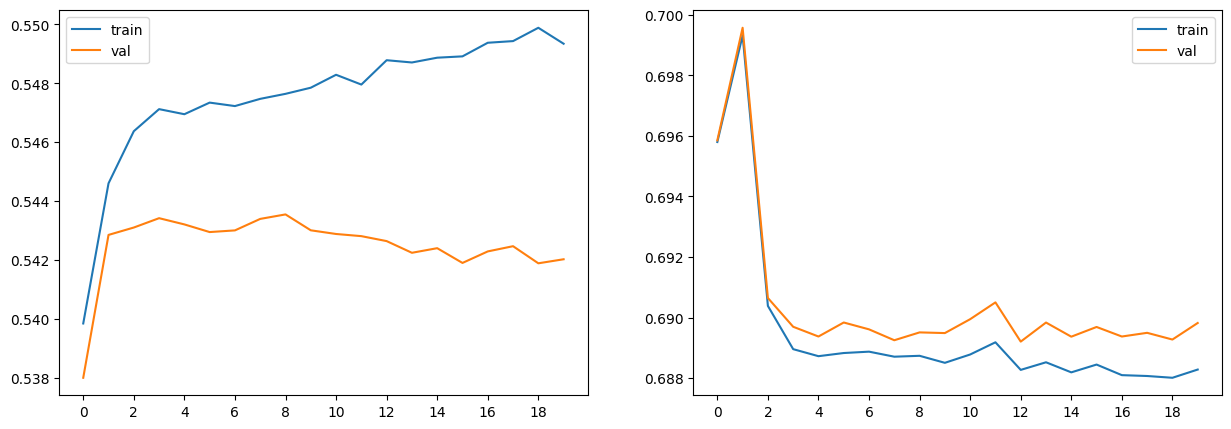

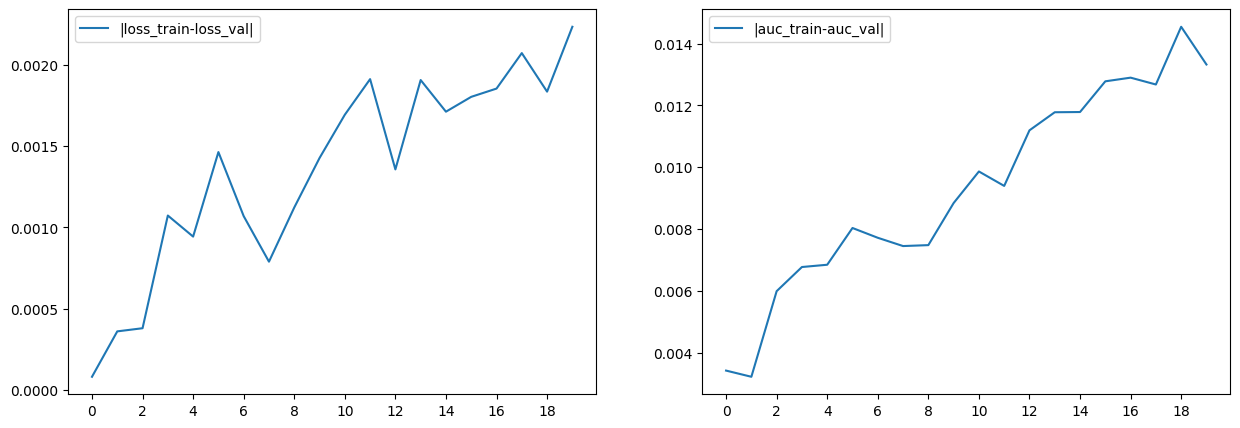

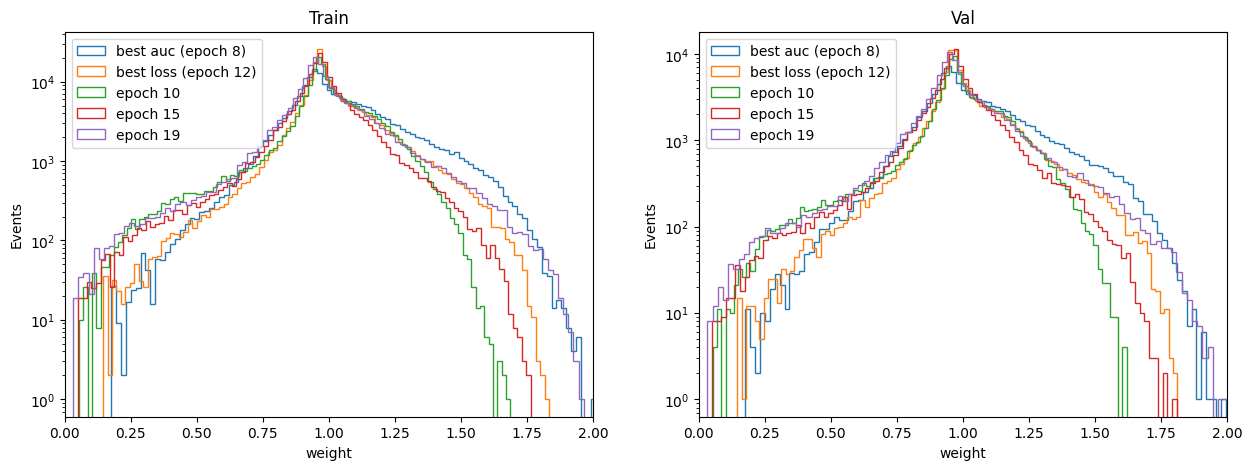

In [4]:
distortion = 'shifted'

for trial in [1]:
    auc_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/auc_train.npy')
    auc_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/auc_val.npy')

    loss_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/loss_train.npy')
    loss_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/loss_val.npy')
    # best auc epoch
    best_auc_epoch = np.argmax(auc_val)
    # best loss epoch
    best_loss_epoch = np.argmin(loss_val)


    # 3 figures side by side
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)

    plt.plot(auc_train, label='train')
    plt.plot(auc_val, label='val')
  #  plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
  #  plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.xticks(np.arange(0, 20, 2))
    plt.legend()
   # plt.show()
    plt.subplot(1,2,2)

    plt.plot(loss_train, label='train')
    plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
    #plt.ylim(0.6931,0.6932)
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()


    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)

    plt.plot(np.abs(loss_train-loss_val)/loss_train, label='|loss_train-loss_val|')
   # plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
   # plt.show()

    plt.subplot(1,2,2)

    plt.plot(np.abs(auc_train-auc_val)/auc_train, label='|auc_train-auc_val|')
   # plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
 #   plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
 #   plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()





    epochs = [best_auc_epoch, best_loss_epoch, 10, 15, 19]

    fig, [ax_t,ax_v] = plt.subplots(nrows=1, ncols=2,figsize=(15,5)) 

    for i,epoch in enumerate(epochs):
        score_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/score_val_{epoch}.npy')[:,0]
        score_train = np.load(f'output/trial_{trial}_pn_lite_{distortion}/score_train_{epoch}.npy')[:,0]
        weight_val = score_val/(1-score_val)
        weight_train = score_train/(1-score_train)

        

        if i == 0:
            ax_t.hist(weight_train, bins=100, label=f'best auc (epoch {epoch})', histtype='step')

        elif i == 1:
            ax_t.hist(weight_train, bins=100, label=f'best loss (epoch {epoch})', histtype='step')

        else:
            if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                continue
            ax_t.hist(weight_train, bins=100, label=f'epoch {epoch}', histtype='step')

            ax_t.set_xlim(0.,2)




        if i == 0:
            ax_v.hist(weight_val, bins=100, label=f'best auc (epoch {epoch})', histtype='step')

        elif i == 1:
            ax_v.hist(weight_val, bins=100, label=f'best loss (epoch {epoch})', histtype='step')

        else:
            if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                continue
            ax_v.hist(weight_val, bins=100, label=f'epoch {epoch}', histtype='step')

            ax_v.set_xlim(0.,2)


        ax_t.legend(loc='upper left')
        ax_v.legend(loc='upper left')
        ax_t.set_yscale('log')
        ax_v.set_yscale('log')
        ax_t.set_xlabel('weight')
        ax_v.set_xlabel('weight')
        ax_t.set_ylabel('Events')
        ax_v.set_ylabel('Events')
        ax_t.set_title('Train')
        ax_v.set_title('Val')
        #ax_t.set_ylim(0.6931,0.6932)
    plt.show()

   


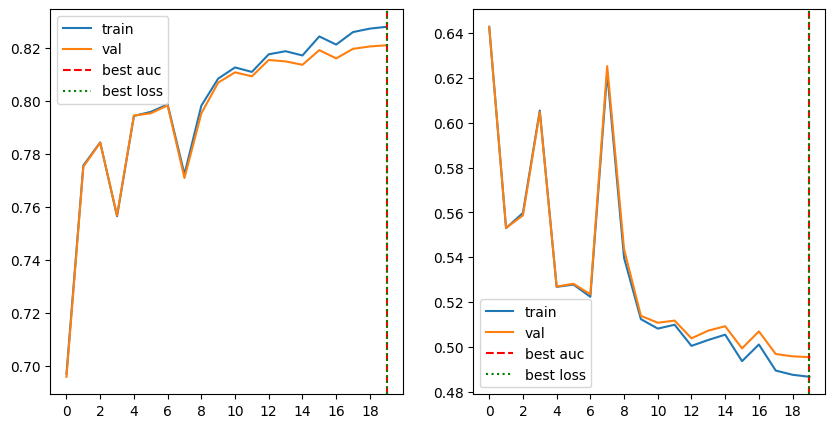

/tmp/ipykernel_484283/3584936316.py:46: RuntimeWarning: divide by zero encountered in divide
  weight = score/(1-score)


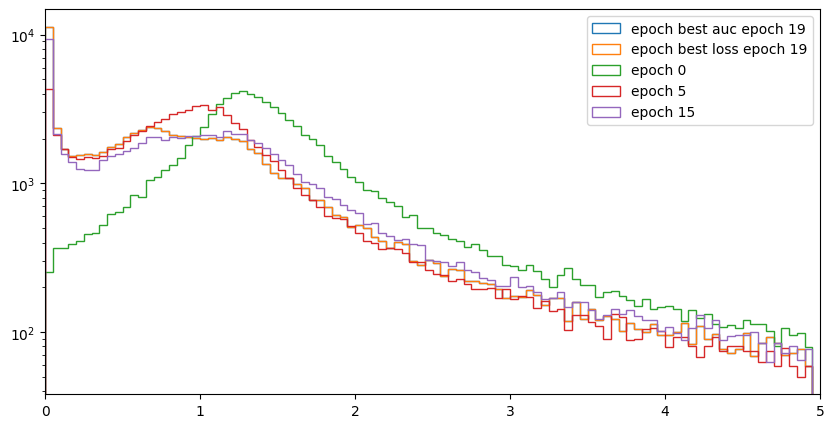

In [88]:
trial = 1
distortions = ['eta_smeared']


for distortion in distortions:
    auc_train = np.load(f'output/trial_{trial}_pn_{distortion}/auc_train.npy')
    auc_val = np.load(f'output/trial_{trial}_pn_{distortion}/auc_val.npy')

    loss_train = np.load(f'output/trial_{trial}_pn_{distortion}/loss_train.npy')
    loss_val = np.load(f'output/trial_{trial}_pn_{distortion}/loss_val.npy')
    # best auc epoch
    best_auc_epoch = np.argmax(auc_val)
    # best loss epoch
    best_loss_epoch = np.argmin(loss_val)


    # 3 figures side by side
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)

    plt.plot(auc_train, label='train')
    plt.plot(auc_val, label='val')
    plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
    plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.xticks(np.arange(0, 20, 2))
    plt.legend()
   # plt.show()
    plt.subplot(1,2,2)

    plt.plot(loss_train, label='train')
    plt.plot(loss_val, label='val')
    plt.xticks(np.arange(0, 20, 2))
    plt.axvline(best_auc_epoch, color='r', linestyle='--', label='best auc')
    plt.axvline(best_loss_epoch, color='g', linestyle='dotted', label='best loss')
    plt.legend()
    plt.show()


    epochs = [best_auc_epoch, best_loss_epoch, 0, 5, 15, 19]
    
    plt.figure(figsize=(10,5))

    for i,epoch in enumerate(epochs):
        score = np.load(f'output/trial_{trial}_pn_{distortion}/score_val_{epoch}.npy')[:,0]
        weight = score/(1-score)


        if i == 0:
            plt.hist(weight, bins=np.arange(0,5,0.05), label=f'best auc (epoch {epoch})', histtype='step')
        elif i == 1:
            plt.hist(weight, bins=np.arange(0,5,0.05), label=f'best loss (epoch {epoch})', histtype='step')
        else:
            if (epoch == best_auc_epoch) | (epoch == best_loss_epoch):
                continue
            plt.hist(weight, bins=np.arange(0,5,0.05), label=f'epoch {epoch}', histtype='step')
    plt.legend(loc='upper right')
    plt.xlim(0,5)
    plt.yscale('log')
    plt.show()


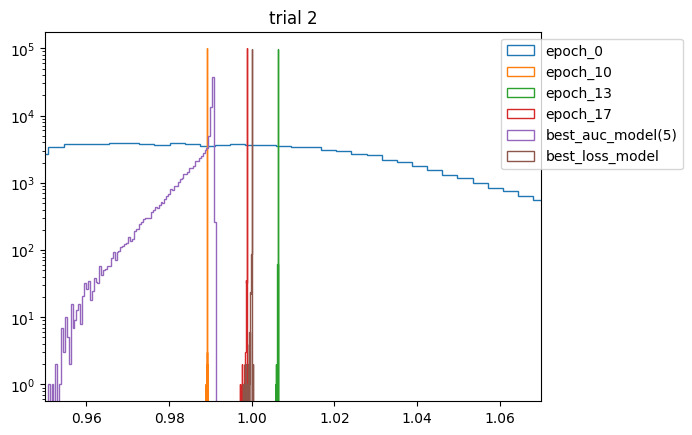

In [8]:
exp_name = trials_truth[1]
save_dir = f'output/{exp_name}'

for i in [0,10,13,17]:
    score = np.load(f'{save_dir}/score_{i}.npy')[:,0]
    weight = score/(1-score)

    plt.hist(weight, bins=100, histtype='step', label=f'epoch_{i}')
    plt.yscale('log')
#plt.show()


score = np.load(f'{save_dir}/best_model_score.npy')[:,0]
weight = score/(1-score)


plt.hist(weight, bins=100, histtype='step', label=f'best_auc_model(5)')

score = np.load(f'{save_dir}/best_model_val_loss.npy')[:,0]
weight = score/(1-score)
plt.hist(weight, bins=100, histtype='step', label=f'best_loss_model')

plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.xlim(0.95,1.07)
plt.title('trial 2')
plt.yscale('log')
plt.show()




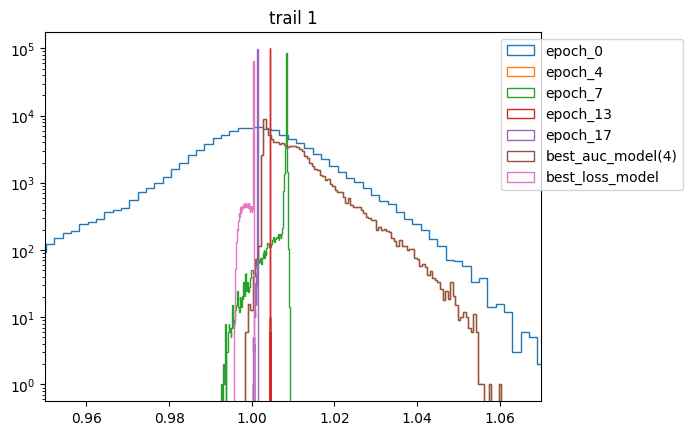

In [9]:
exp_name = trials_truth[0]
save_dir = f'output/{exp_name}'

for i in [0,4,7,13,17]:
    score = np.load(f'{save_dir}/score_{i}.npy')[:,0]
    weight = score/(1-score)

    plt.hist(weight, bins=100, histtype='step', label=f'epoch_{i}')
    plt.yscale('log')
#plt.show()


score = np.load(f'{save_dir}/best_model_score.npy')[:,0]
weight = score/(1-score)


plt.hist(weight, bins=100, histtype='step', label=f'best_auc_model(4)')

score = np.load(f'{save_dir}/best_model_val_loss.npy')[:,0]
weight = score/(1-score)
plt.hist(weight, bins=100, histtype='step', label=f'best_loss_model')

plt.yscale('log')
plt.title('trail 1')
plt.xlim(0.95,1.07)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

plt.show()


